# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/AI/day005/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
corr = app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [76]:
corr_sort = corr.sort_values()
corr_abs_sort = corr.abs().sort_values()
print(corr_abs_sort[1:16])
print(corr_abs_sort[-16:-1])

FLAG_DOCUMENT_5               0.000316
FLAG_CONT_MOBILE              0.000370
FLAG_MOBIL                    0.000534
FLAG_DOCUMENT_12              0.000756
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
FLAG_DOCUMENT_19              0.001358
FLAG_DOCUMENT_10              0.001414
FLAG_DOCUMENT_7               0.001520
NONLIVINGAPARTMENTS_MODE      0.001557
FLAG_EMAIL                    0.001758
AMT_REQ_CREDIT_BUREAU_QRT     0.002022
SK_ID_CURR                    0.002108
FLAG_DOCUMENT_4               0.002672
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
Name: TARGET, dtype: float64
FLOORSMAX_AVG                  0.044003
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED_ANOM             0.045987
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CIT

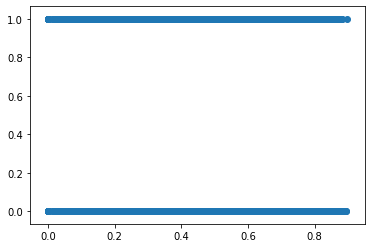

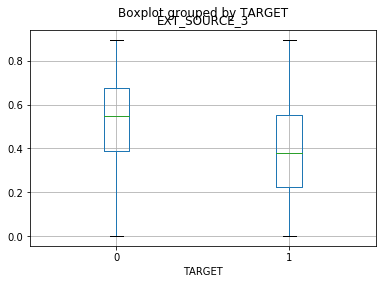

In [79]:
plt.scatter(app_train['EXT_SOURCE_3'], app_train['TARGET'])
app_train.boxplot(column=['EXT_SOURCE_3'], by = 'TARGET')

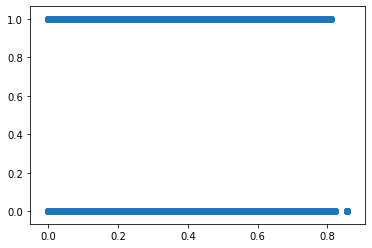

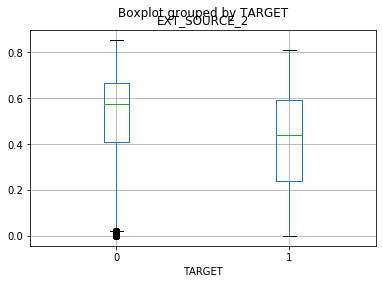

In [80]:
plt.scatter(app_train['EXT_SOURCE_2'], app_train['TARGET'])
app_train.boxplot(column=['EXT_SOURCE_2'], by = 'TARGET')

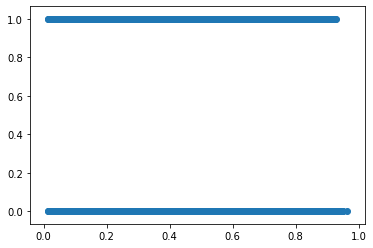

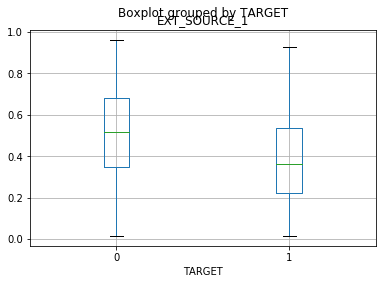

In [81]:
plt.scatter(app_train['EXT_SOURCE_1'], app_train['TARGET'])
app_train.boxplot(column=['EXT_SOURCE_1'], by = 'TARGET')

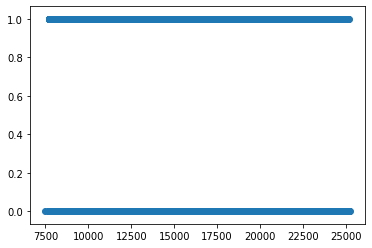

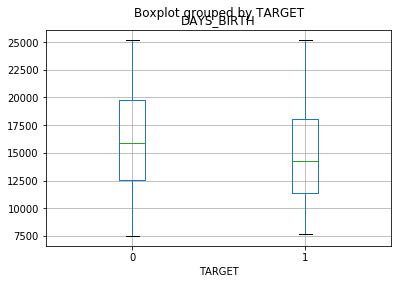

In [82]:
plt.scatter(app_train['DAYS_BIRTH'], app_train['TARGET'])
app_train.boxplot(column=['DAYS_BIRTH'], by = 'TARGET')

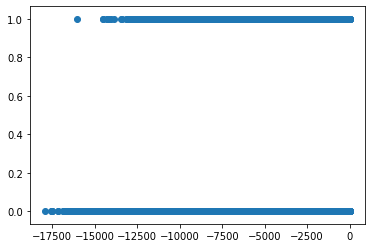

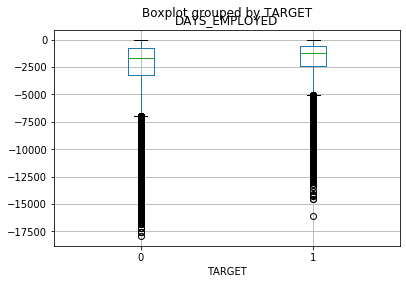

In [83]:
plt.scatter(app_train['DAYS_EMPLOYED'], app_train['TARGET'])
app_train.boxplot(column=['DAYS_EMPLOYED'], by = 'TARGET')

TARGET  REGION_RATING_CLIENT_W_CITY
0       1                               32513
        2                              211314
        3                               38859
1       1                                1654
        2                               18170
        3                                5001
Name: SK_ID_CURR, dtype: int64

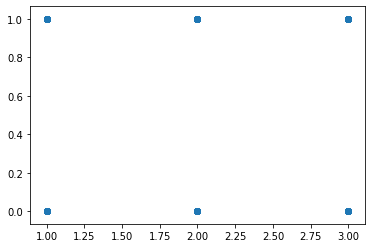

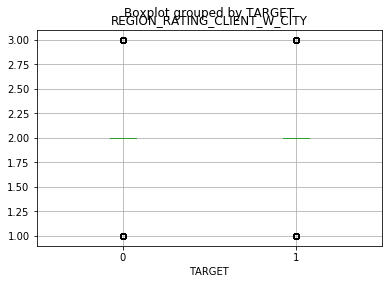

In [116]:
plt.scatter(app_train['REGION_RATING_CLIENT_W_CITY'], app_train['TARGET'])
app_train.boxplot(column=['REGION_RATING_CLIENT_W_CITY'], by = 'TARGET')
app_train.groupby(['TARGET', 'REGION_RATING_CLIENT_W_CITY'])['SK_ID_CURR'].count()

TARGET  REGION_RATING_CLIENT
0       1                        30645
        2                       209077
        3                        42964
1       1                         1552
        2                        17907
        3                         5366
Name: SK_ID_CURR, dtype: int64

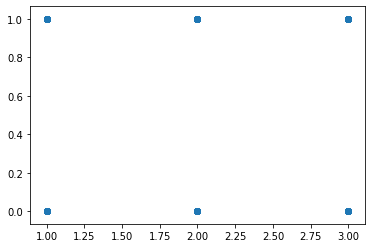

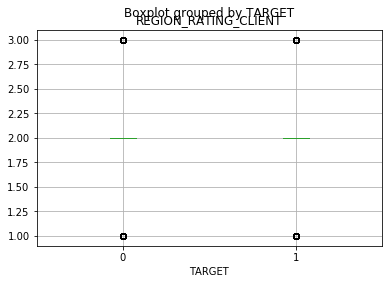

In [117]:
plt.scatter(app_train['REGION_RATING_CLIENT'], app_train['TARGET'])
app_train.boxplot(column=['REGION_RATING_CLIENT'], by = 'TARGET')
app_train.groupby(['TARGET', 'REGION_RATING_CLIENT'])['SK_ID_CURR'].count()

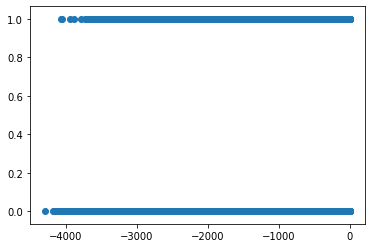

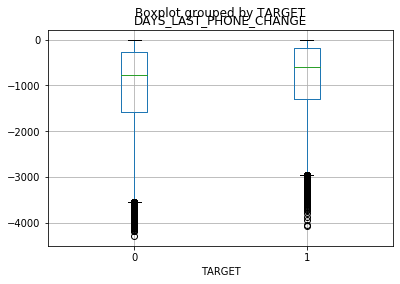

In [86]:
plt.scatter(app_train['DAYS_LAST_PHONE_CHANGE'], app_train['TARGET'])
app_train.boxplot(column=['DAYS_LAST_PHONE_CHANGE'], by = 'TARGET')

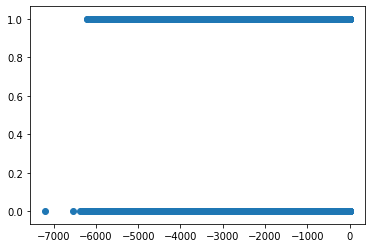

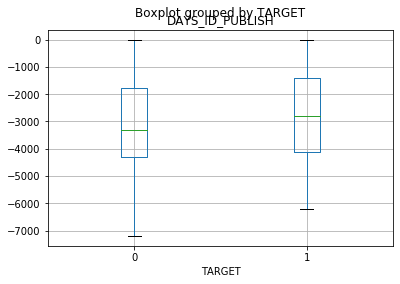

In [87]:
plt.scatter(app_train['DAYS_ID_PUBLISH'], app_train['TARGET'])
app_train.boxplot(column=['DAYS_ID_PUBLISH'], by = 'TARGET')

TARGET  REG_CITY_NOT_WORK_CITY
0       0                         219339
        1                          63347
1       0                          17305
        1                           7520
Name: SK_ID_CURR, dtype: int64

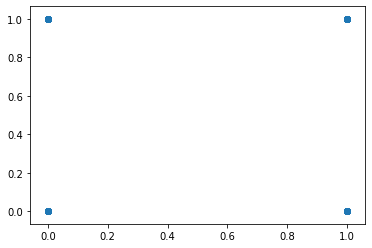

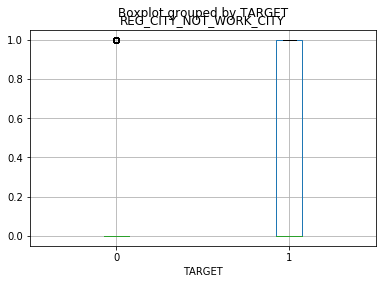

In [118]:
plt.scatter(app_train['REG_CITY_NOT_WORK_CITY'], app_train['TARGET'])
app_train.boxplot(column=['REG_CITY_NOT_WORK_CITY'], by = 'TARGET')
app_train.groupby(['TARGET', 'REG_CITY_NOT_WORK_CITY'])['SK_ID_CURR'].count()

TARGET  DAYS_EMPLOYED_ANOM
0       False                 230302
        True                   52384
1       False                  21835
        True                    2990
Name: SK_ID_CURR, dtype: int64

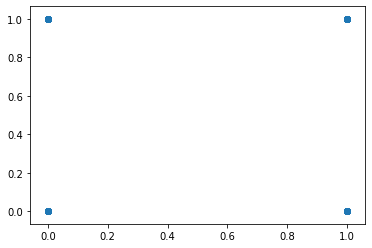

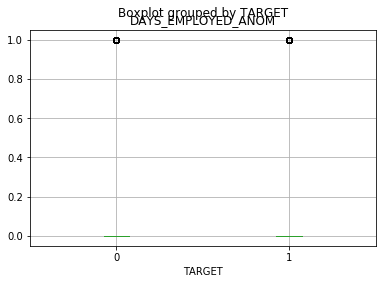

In [119]:
plt.scatter(app_train['DAYS_EMPLOYED_ANOM'], app_train['TARGET'])
app_train.boxplot(column=['DAYS_EMPLOYED_ANOM'], by = 'TARGET')
app_train.groupby(['TARGET', 'DAYS_EMPLOYED_ANOM'])['SK_ID_CURR'].count()

TARGET  FLAG_EMP_PHONE
0       0                  52395
        1                 230291
1       0                   2991
        1                  21834
Name: SK_ID_CURR, dtype: int64

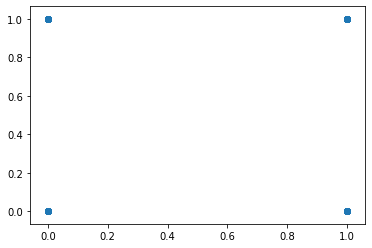

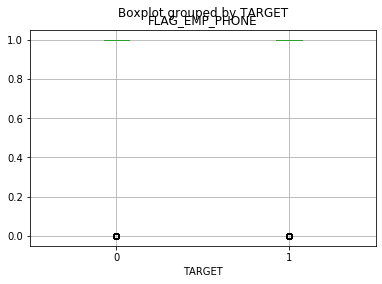

In [120]:
plt.scatter(app_train['FLAG_EMP_PHONE'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_EMP_PHONE'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_EMP_PHONE'])['SK_ID_CURR'].count()

TARGET  REG_CITY_NOT_LIVE_CITY
0       0                         261586
        1                          21100
1       0                          21886
        1                           2939
Name: SK_ID_CURR, dtype: int64

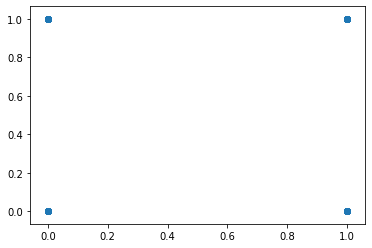

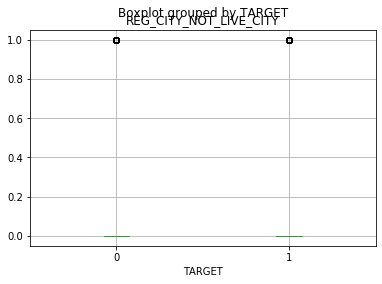

In [121]:
plt.scatter(app_train['REG_CITY_NOT_LIVE_CITY'], app_train['TARGET'])
app_train.boxplot(column=['REG_CITY_NOT_LIVE_CITY'], by = 'TARGET')
app_train.groupby(['TARGET', 'REG_CITY_NOT_LIVE_CITY'])['SK_ID_CURR'].count()

TARGET  FLAG_DOCUMENT_3
0       0                   83658
        1                  199028
1       0                    5513
        1                   19312
Name: SK_ID_CURR, dtype: int64

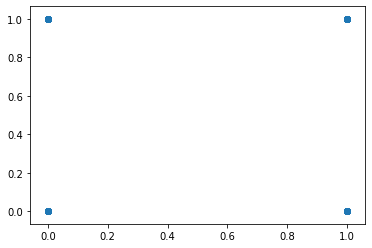

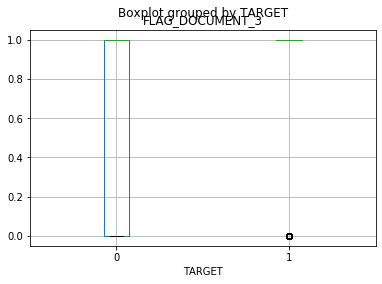

In [122]:
plt.scatter(app_train['FLAG_DOCUMENT_3'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_3'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_3'])['SK_ID_CURR'].count()

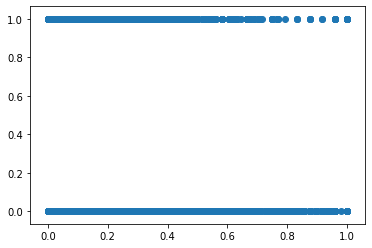

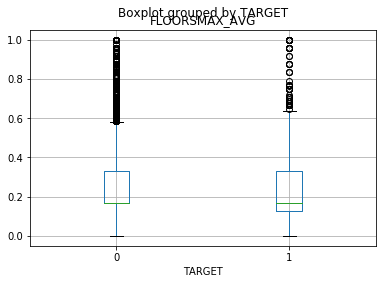

In [93]:
plt.scatter(app_train['FLOORSMAX_AVG'], app_train['TARGET'])
app_train.boxplot(column=['FLOORSMAX_AVG'], by = 'TARGET')

TARGET  FLAG_DOCUMENT_5
0       0                  278410
        1                    4276
1       0                   24453
        1                     372
Name: SK_ID_CURR, dtype: int64

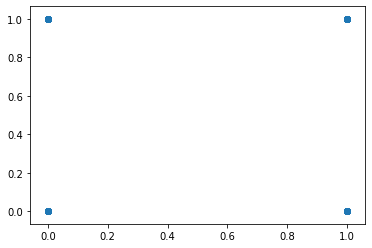

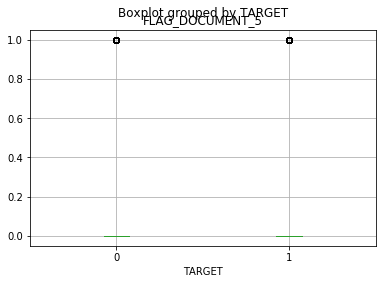

In [124]:
plt.scatter(app_train['FLAG_DOCUMENT_5'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_5'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_5'])['SK_ID_CURR'].count()

TARGET  FLAG_CONT_MOBILE
0       0                      529
        1                   282157
1       0                       45
        1                    24780
Name: SK_ID_CURR, dtype: int64

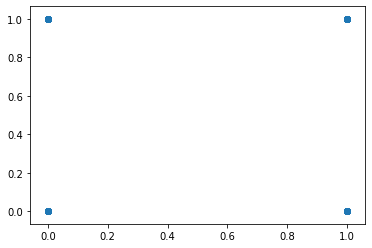

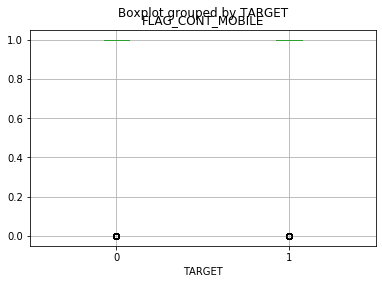

In [126]:
plt.scatter(app_train['FLAG_CONT_MOBILE'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_CONT_MOBILE'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_CONT_MOBILE'])['SK_ID_CURR'].count()

TARGET  FLAG_MOBIL
0       0                  1
        1             282685
1       1              24825
Name: SK_ID_CURR, dtype: int64

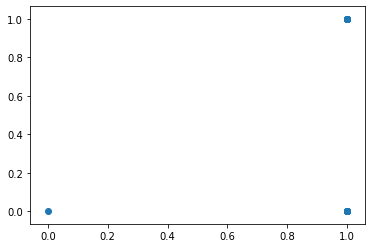

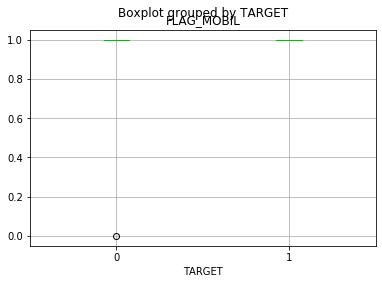

In [127]:
plt.scatter(app_train['FLAG_MOBIL'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_MOBIL'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_MOBIL'])['SK_ID_CURR'].count()

TARGET  FLAG_DOCUMENT_12
0       0                   282684
        1                        2
1       0                    24825
Name: SK_ID_CURR, dtype: int64

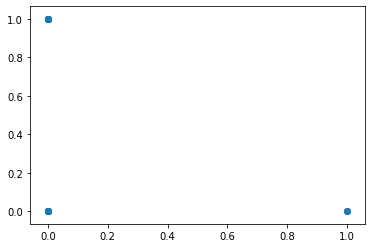

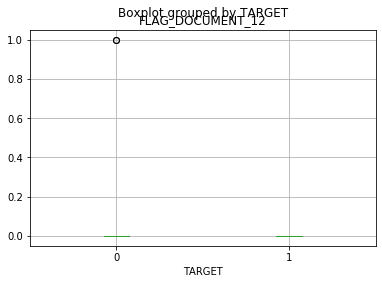

In [128]:
plt.scatter(app_train['FLAG_DOCUMENT_12'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_12'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_12'])['SK_ID_CURR'].count()

TARGET  AMT_REQ_CREDIT_BUREAU_WEEK
0       0.0                           237591
        1.0                             7570
        2.0                              179
        3.0                               54
        4.0                               30
        5.0                                9
        6.0                               19
        7.0                                2
        8.0                                5
1       0.0                            19865
        1.0                              638
        2.0                               20
        3.0                                4
        4.0                                4
        5.0                                1
        6.0                                1
Name: SK_ID_CURR, dtype: int64

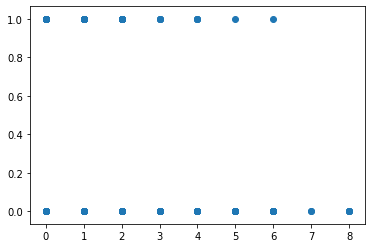

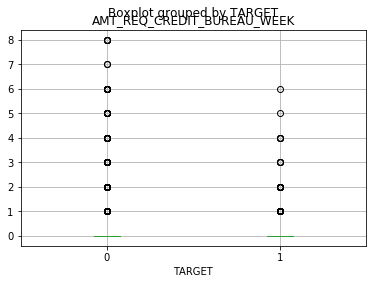

In [130]:
plt.scatter(app_train['AMT_REQ_CREDIT_BUREAU_WEEK'], app_train['TARGET'])
app_train.boxplot(column=['AMT_REQ_CREDIT_BUREAU_WEEK'], by = 'TARGET')
app_train.groupby(['TARGET', 'AMT_REQ_CREDIT_BUREAU_WEEK'])['SK_ID_CURR'].count()

TARGET  AMT_REQ_CREDIT_BUREAU_HOUR
0       0.0                           243964
        1.0                             1435
        2.0                               50
        3.0                                9
        4.0                                1
1       0.0                            20402
        1.0                              125
        2.0                                6
Name: SK_ID_CURR, dtype: int64

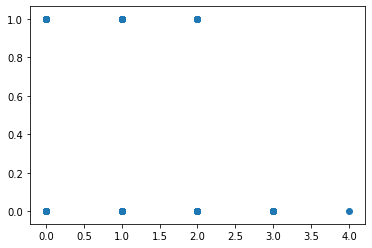

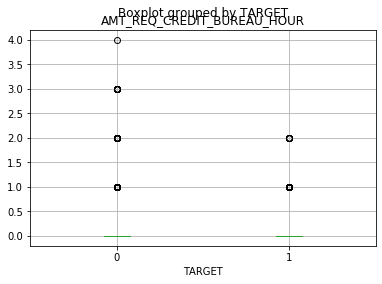

In [132]:
plt.scatter(app_train['AMT_REQ_CREDIT_BUREAU_HOUR'], app_train['TARGET'])
app_train.boxplot(column=['AMT_REQ_CREDIT_BUREAU_HOUR'], by = 'TARGET')
app_train.groupby(['TARGET', 'AMT_REQ_CREDIT_BUREAU_HOUR'])['SK_ID_CURR'].count()

TARGET  FLAG_DOCUMENT_19
0       0                   282515
        1                      171
1       0                    24813
        1                       12
Name: SK_ID_CURR, dtype: int64

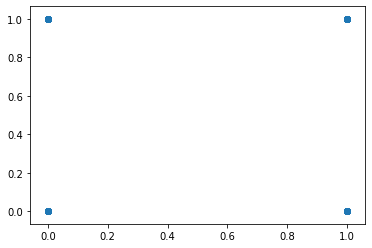

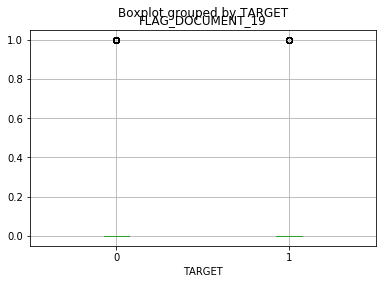

In [133]:
plt.scatter(app_train['FLAG_DOCUMENT_19'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_19'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_19'])['SK_ID_CURR'].count()

TARGET  FLAG_DOCUMENT_10
0       0                   282679
        1                        7
1       0                    24825
Name: SK_ID_CURR, dtype: int64

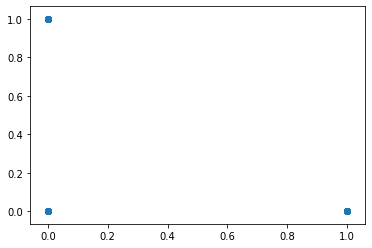

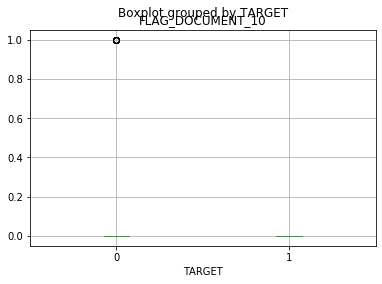

In [134]:
plt.scatter(app_train['FLAG_DOCUMENT_10'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_10'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_10'])['SK_ID_CURR'].count()

TARGET  FLAG_DOCUMENT_7
0       0                  282630
        1                      56
1       0                   24822
        1                       3
Name: SK_ID_CURR, dtype: int64

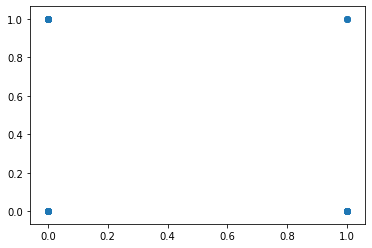

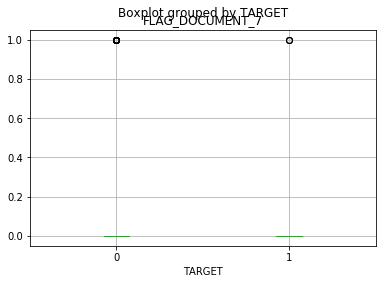

In [135]:
plt.scatter(app_train['FLAG_DOCUMENT_7'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_7'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_7'])['SK_ID_CURR'].count()

In [149]:
print(app_train['NONLIVINGAPARTMENTS_MODE'].corr(app_train['TARGET']))
print(app_train['TARGET'].corr(np.log(app_train['NONLIVINGAPARTMENTS_MODE'])))

-0.0015565608459037709
nan


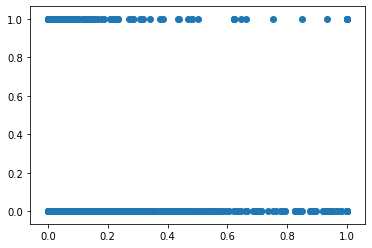

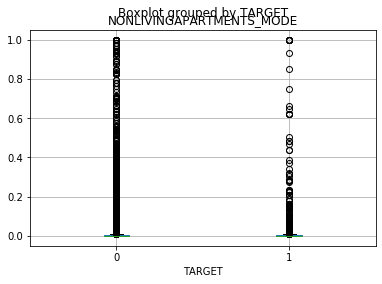

In [136]:
plt.scatter(app_train['NONLIVINGAPARTMENTS_MODE'], app_train['TARGET'])
app_train.boxplot(column=['NONLIVINGAPARTMENTS_MODE'], by = 'TARGET')

TARGET  FLAG_EMAIL
0       0             266618
        1              16068
1       0              23451
        1               1374
Name: SK_ID_CURR, dtype: int64

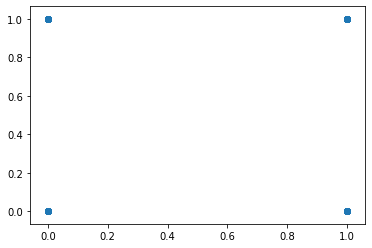

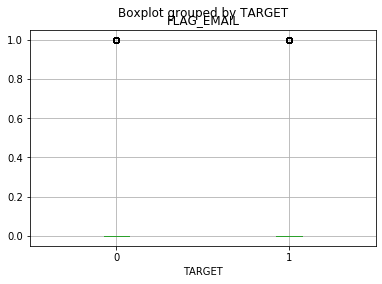

In [137]:
plt.scatter(app_train['FLAG_EMAIL'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_EMAIL'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_EMAIL'])['SK_ID_CURR'].count()

In [148]:
print(app_train['AMT_REQ_CREDIT_BUREAU_QRT'].corr(app_train['TARGET']))
print(app_train['TARGET'].corr(np.log(app_train['AMT_REQ_CREDIT_BUREAU_QRT'])))

-0.002021927435345643
nan


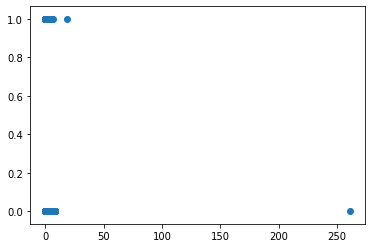

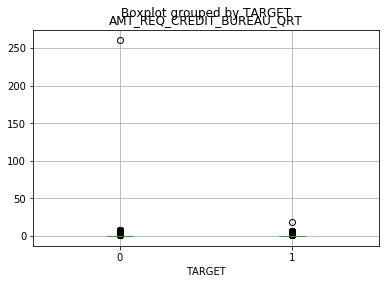

In [138]:
plt.scatter(app_train['AMT_REQ_CREDIT_BUREAU_QRT'], app_train['TARGET'])
app_train.boxplot(column=['AMT_REQ_CREDIT_BUREAU_QRT'], by = 'TARGET')

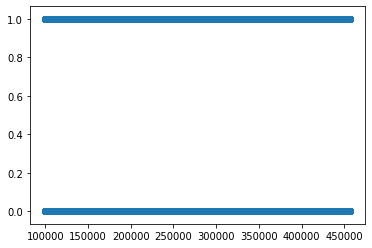

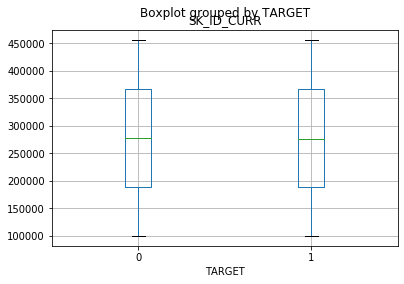

In [139]:
plt.scatter(app_train['SK_ID_CURR'], app_train['TARGET'])
app_train.boxplot(column=['SK_ID_CURR'], by = 'TARGET')

TARGET  FLAG_DOCUMENT_4
0       0                  282661
        1                      25
1       0                   24825
Name: SK_ID_CURR, dtype: int64

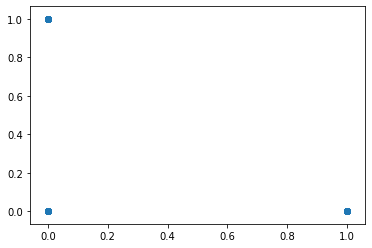

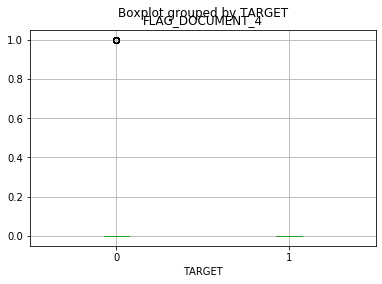

In [140]:
plt.scatter(app_train['FLAG_DOCUMENT_4'], app_train['TARGET'])
app_train.boxplot(column=['FLAG_DOCUMENT_4'], by = 'TARGET')
app_train.groupby(['TARGET', 'FLAG_DOCUMENT_4'])['SK_ID_CURR'].count()

TARGET  AMT_REQ_CREDIT_BUREAU_DAY
0       0.0                          244111
        1.0                            1167
        2.0                              95
        3.0                              43
        4.0                              23
        5.0                               9
        6.0                               8
        8.0                               1
        9.0                               2
1       0.0                           20392
        1.0                             125
        2.0                              11
        3.0                               2
        4.0                               3
Name: SK_ID_CURR, dtype: int64

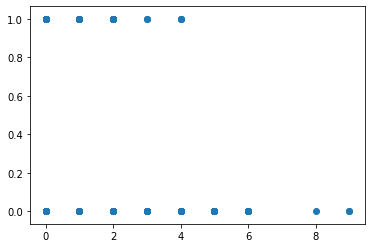

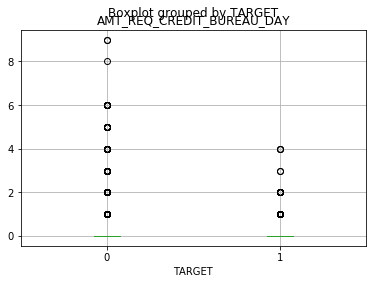

In [141]:
plt.scatter(app_train['AMT_REQ_CREDIT_BUREAU_DAY'], app_train['TARGET'])
app_train.boxplot(column=['AMT_REQ_CREDIT_BUREAU_DAY'], by = 'TARGET')
app_train.groupby(['TARGET', 'AMT_REQ_CREDIT_BUREAU_DAY'])['SK_ID_CURR'].count()